In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
dropped = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Cabin', 'Ticket', 'Embarked'], axis='columns')
dropped

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [36]:
inputs = df[['Pclass', 'Sex', 'Age', 'Fare']]
target = df['Survived']

In [44]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
inputs.loc[:, 'sex_n'] = le_sex.fit_transform(inputs['Sex'])


In [66]:
inputs_n = inputs.drop('Sex', axis='columns')
inputs_n

,Pclass,Age,Fare,sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,NaN,23.4500,0
889,1,26.0,30.0000,1


In [60]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_n, target, test_size=0.2)


In [62]:
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [63]:
model.score(inputs_n,target)

0.9797979797979798

In [73]:
# Making predictions
features = ['Pclass', 'Age', 'Fare', 'sex_n']
input_data = pd.DataFrame([[3,	22.0,	7.2500,	1]], columns=features)
prediction = model.predict(input_data)

print(prediction)

[0]


In [78]:
# data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

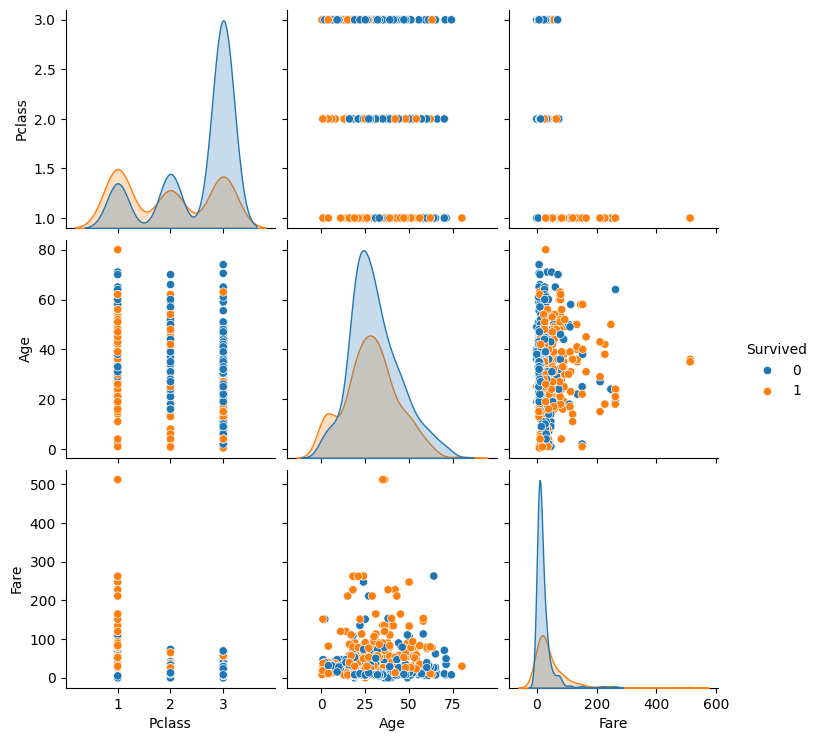

In [75]:
sns.pairplot(df[['Pclass', 'Age', 'Fare', 'Survived']], hue='Survived')
plt.show()


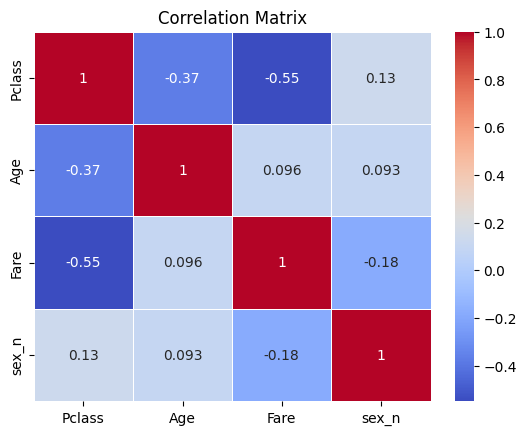

In [77]:
correlation_matrix = inputs_n.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Text(95.72222222222221, 0.5, 'Truth')

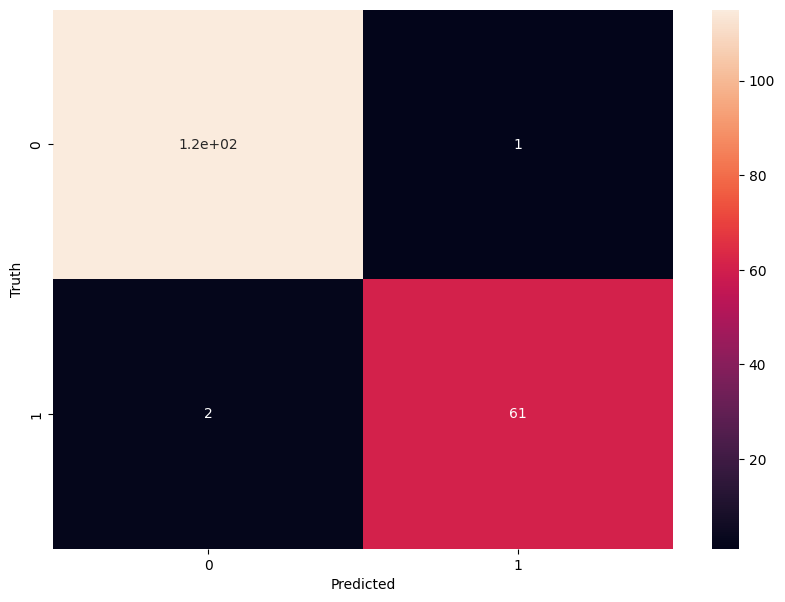

In [82]:
# To check times where our model wasn't doing right
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')